Importing the Necessary Libraries

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

Importing the Dataset

In [5]:
data = pd.read_csv('/content/TCS Historical Data (1).csv')

First 5 Rows

In [6]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,19-12-2024,"4,274.50","4,324.00","4,362.90","4,265.50",1.92M,-1.69%
1,18-12-2024,"4,347.85","4,311.70","4,362.00","4,289.60",1.58M,0.45%
2,17-12-2024,"4,328.50","4,410.00","4,432.95","4,318.00",3.23M,-1.96%
3,16-12-2024,"4,415.20","4,459.00","4,475.00","4,397.00",1.65M,-1.31%
4,13-12-2024,"4,473.90","4,434.95","4,494.90","4,394.40",1.97M,0.43%


Last 5 Rows

In [7]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
5036,01-09-2004,119.22,119.47,120.07,118.7,19.94M,-0.02%
5037,31-08-2004,119.24,119.05,119.47,117.78,21.19M,0.13%
5038,30-08-2004,119.08,117.04,119.47,116.45,24.47M,2.50%
5039,27-08-2004,116.17,118.55,118.55,115.67,30.65M,-1.67%
5040,26-08-2004,118.14,119.71,120.31,117.69,40.44M,-0.91%


Info about Dataframe

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5041 entries, 0 to 5040
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      5041 non-null   object
 1   Price     5041 non-null   object
 2   Open      5041 non-null   object
 3   High      5041 non-null   object
 4   Low       5041 non-null   object
 5   Vol.      5041 non-null   object
 6   Change %  5041 non-null   object
dtypes: object(7)
memory usage: 275.8+ KB


Describe function for Dataframe

In [9]:
data.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,5041,5041,5041,5041,5041,5041,5041
unique,5041,4891,3993,4440,4508,979,889
top,19-12-2024,"1,228.53","1,225.57","1,228.02",540.63,1.53M,-0.12%
freq,1,3,11,6,8,31,28


Rows and Columns

In [10]:
data.shape

(5041, 7)

DATA CLEANING

Convert 'Date' to datetime

In [11]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=True)

Remove commas and convert price-related columns to float

In [12]:
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)

Clean 'Vol.' column

In [13]:
def parse_volume(vol):
    if isinstance(vol, str):
        if 'M' in vol:
            return float(vol.replace('M', '')) * 1_000_000
        elif 'K' in vol:
            return float(vol.replace('K', '')) * 1_000
        elif 'B' in vol:
            return float(vol.replace('B', '')) * 1e9
        elif vol == '-' or vol == '':
            return pd.NA
        else:
            try:
                return float(vol)
            except ValueError:
                return pd.NA
    return vol
data['Vol.'] = data['Vol.'].apply(parse_volume)

Clean 'Change %' column (Remove % symbol)

In [14]:
data['Change %'] = data['Change %'].str.replace('%', '').astype(float)

Check for Null Values

In [15]:
data.isnull().sum().sum()

0

Check for Duplicate Values

In [16]:
data.duplicated().sum()

0

EDA

Open Stock Prices of TCS

Highest Open Price reached is 4576.0 at 2024-09-02
Lowest Open Price reached is 108.13 at 2009-03-04


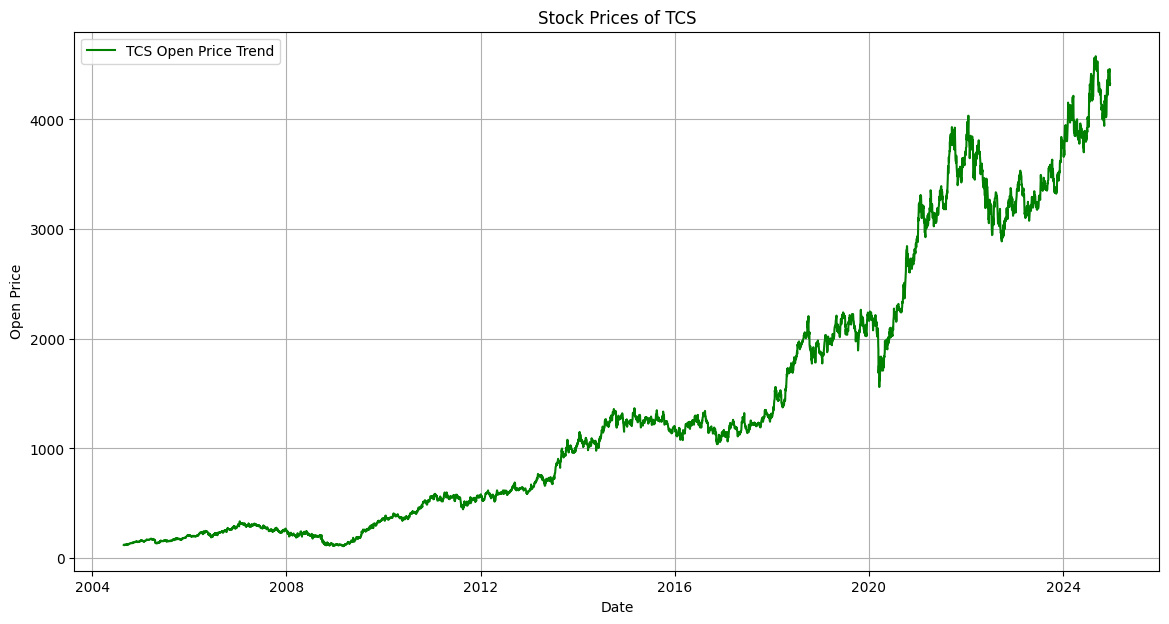

In [17]:
peak_date = data.loc[data['Open'].idxmax(), 'Date'].date()
min_date = data.loc[data['Open'].idxmin(), 'Date'].date()
peak_price = data['Open'].max()
min_price = data['Open'].min()
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Open'], color='green',label='TCS Open Price Trend')
plt.title('Stock Prices of TCS')
print(f"Highest Open Price reached is {peak_price} at {peak_date}")
print(f"Lowest Open Price reached is {min_price} at {min_date}")
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.grid()
plt.show()

Stock Prices of TCS

Highest Price reached is 4553.75 at 2024-08-30
Lowest Price reached is 107.69 at 2009-03-03


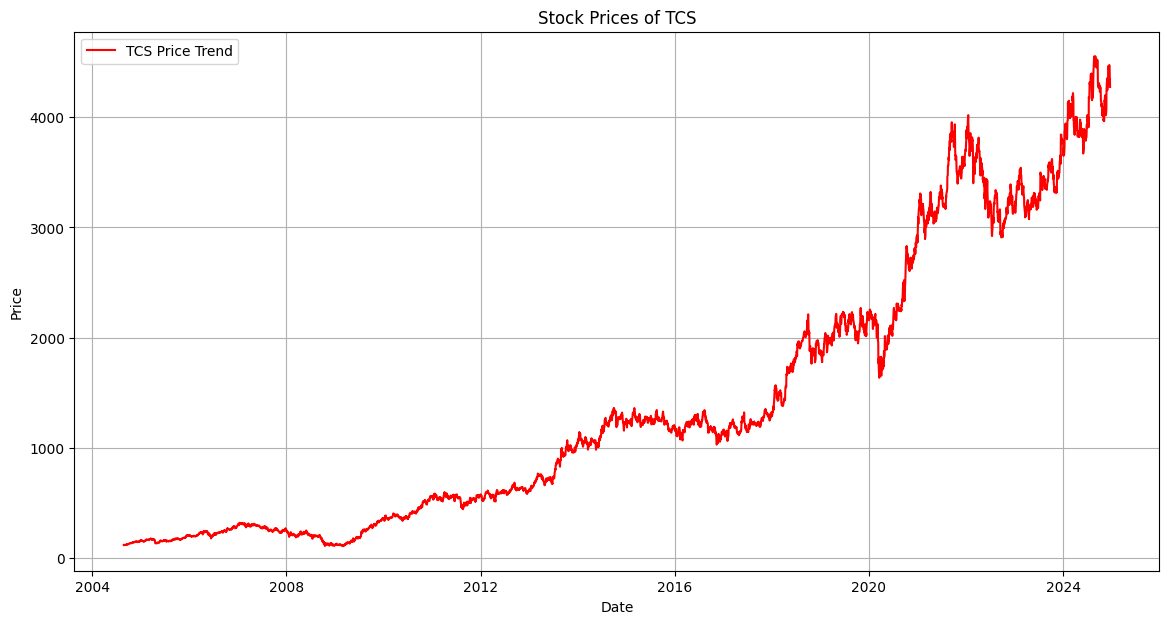

In [18]:
peak_date = data.loc[data['Price'].idxmax(), 'Date'].date()
min_date = data.loc[data['Price'].idxmin(), 'Date'].date()
peak_price = data['Price'].max()
min_price = data['Price'].min()
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Price'], color='red',label='TCS Price Trend')
plt.title('Stock Prices of TCS')
print(f"Highest Price reached is {peak_price} at {peak_date}")
print(f"Lowest Price reached is {min_price} at {min_date}")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

Volume Trend of TCS

Highest Volume reached is 88070000.0 at 2018-03-13
Lowest Volume reached is 56030.0 at 2013-05-11


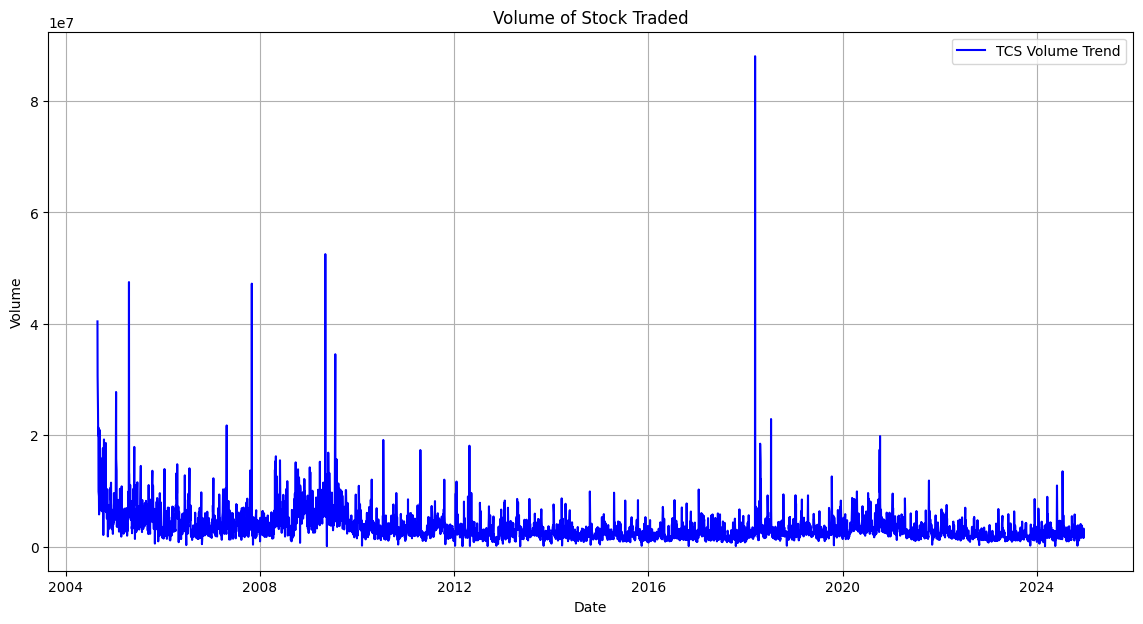

In [19]:
peak_date = data.loc[data['Vol.'].idxmax(), 'Date'].date()
peak_vol = data['Vol.'].max()
min_date = data.loc[data['Vol.'].idxmin(), 'Date'].date()
min_vol = data['Vol.'].min()
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Vol.'], color='blue',label='TCS Volume Trend')
plt.title('Volume of Stock Traded')
print(f"Highest Volume reached is {peak_vol} at {peak_date}")
print(f"Lowest Volume reached is {min_vol} at {min_date}")
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

Candlestick Chart for TCS Data

In [20]:

peak_value = data['High'].max()
peak_date = data.loc[data['High'].idxmax(), 'Date'].date()

# Creation of the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=data['Date'],
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Price'],
    name='Price Movement'
)])

# Add annotation for the peak value
fig.add_trace(go.Scatter(
    x=[peak_date],
    y=[peak_value],
    mode='markers+text',
    text=[f'Peak: {peak_value}'],
    textposition='top center',
    marker=dict(color='red', size=10),
    name='Peak'
))

# Update layout
fig.update_layout(
    title='Candlestick Chart of TCS Share',
    xaxis_title='Date',
    yaxis_title='Price'
)

# Print the peak value
print(f"The peak value is {peak_value} on {peak_date}")

# Show the chart
fig.show()



The peak value is 4592.25 on 2024-08-30


Highest Market Cap reached is 126280050199.99998 at 2018-03-13


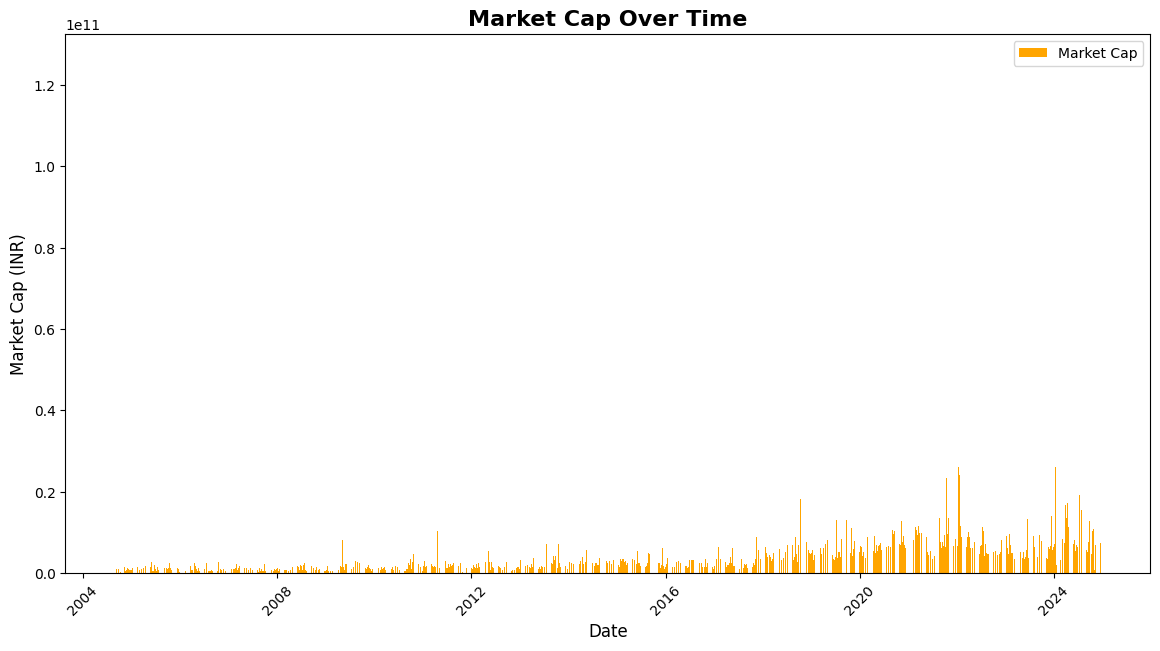

In [22]:
data['MarktCap'] = data['Open'] * data['Vol.']
peak_date = data.loc[data['Vol.'].idxmax(), 'Date'].date()
peak_mc = data['MarktCap'].max()
plt.figure(figsize=(14, 7))
plt.bar(data['Date'], data['MarktCap'], color='orange', label='Market Cap')
plt.title('Market Cap Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Market Cap (INR)', fontsize=12)
print(f"Highest Market Cap reached is {peak_mc} at {peak_date}")
plt.xticks(rotation=45)
plt.legend()
plt.show()


Moving Average of the TCS Stocks

Reached Highest MA50 value at 2024-07-19
Reached Highest MA200 value at 2024-02-29
Reached Highest Price value at 2024-08-30


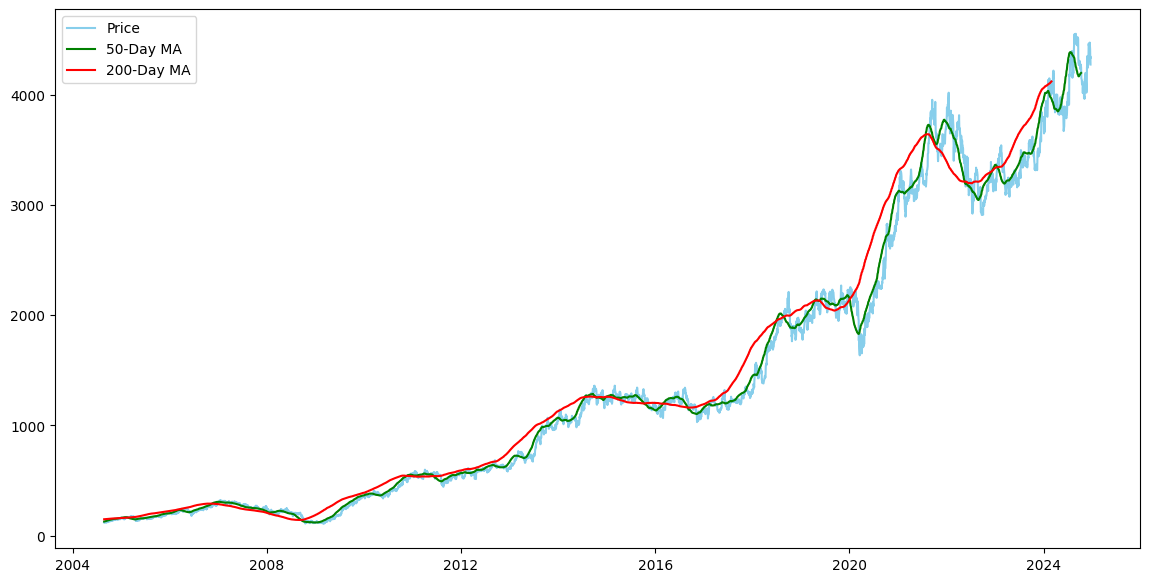

In [23]:
data['MA50'] = data['Open'].rolling(50).mean()
data['MA200'] = data['Open'].rolling(200).mean()
peak_MA50 = data.loc[data['MA50'].idxmax(), 'Date'].date()
peak_MA200 = data.loc[data['MA200'].idxmax(), 'Date'].date()
peak_date = data.loc[data['Price'].idxmax(), 'Date'].date()
print(f"Reached Highest MA50 value at {peak_MA50}")
print(f"Reached Highest MA200 value at {peak_MA200}")
print(f"Reached Highest Price value at {peak_date}")
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Price'], label='Price', color='skyblue')
plt.plot(data['Date'], data['MA50'], label='50-Day MA', color='green')
plt.plot(data['Date'], data['MA200'], label='200-Day MA', color='red')
plt.legend()
plt.show()

Bolinger Band for TCS

Reached Highest MA50_STD value at 2021-07-15
Reached Highest Upper Band value at 2024-07-08
Reached Highest Lower Band value at 2024-07-19


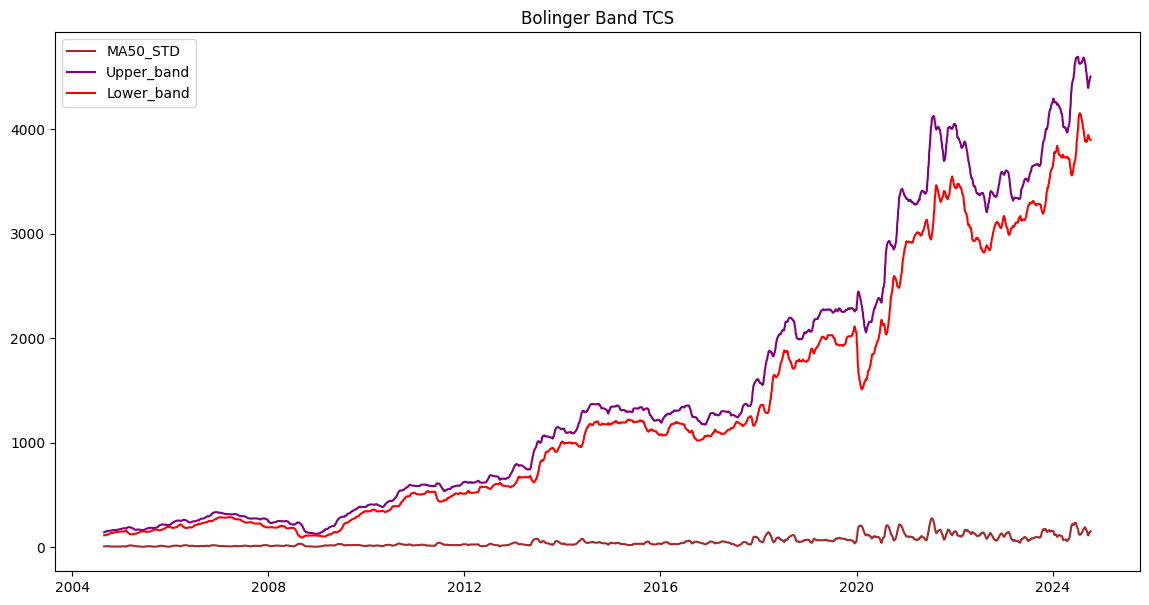

In [24]:
data['MA50_STD'] = data['Open'].rolling(50).std()
data['Upper_band'] = data['MA50'] + (data['MA50_STD'] * 2)
data['Lower_band'] = data['MA50'] - (data['MA50_STD'] * 2)
peak_MA50_STD = data.loc[data['MA50_STD'].idxmax(), 'Date'].date()
peak_ub = data.loc[data['Upper_band'].idxmax(), 'Date'].date()
peak_lb = data.loc[data['Lower_band'].idxmax(), 'Date'].date()
print(f"Reached Highest MA50_STD value at {peak_MA50_STD}")
print(f"Reached Highest Upper Band value at {peak_ub}")
print(f"Reached Highest Lower Band value at {peak_lb}")
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['MA50_STD'], label='MA50_STD', color='brown')
plt.plot(data['Date'], data['Upper_band'], label='Upper_band', color='purple')
plt.plot(data['Date'], data['Lower_band'], label='Lower_band', color='red')
plt.title('Bolinger Band TCS')
plt.legend()
plt.show()

Return Percentage

Total return percentage: -97.23%


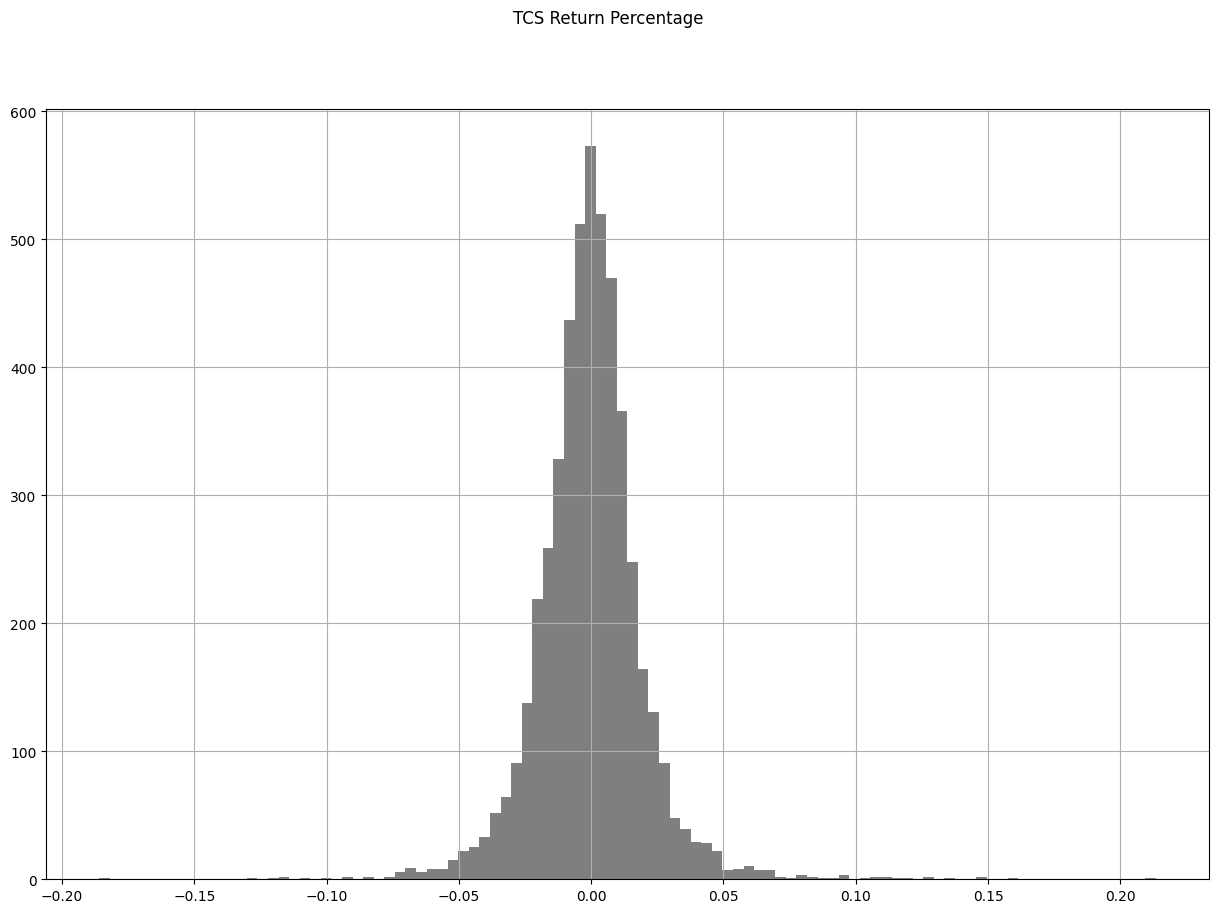

In [25]:
# Calculation of daily returns
data['returns'] = (data['Open'] / data['Open'].shift(1)) - 1
# Calculatipn of cumulative return percentage
cumulative_return = (data['returns'] + 1).cumprod().iloc[-1] - 1
# Convertion to percentage
return_percentage = cumulative_return * 100
print(f"Total return percentage: {return_percentage:.2f}%")
data['returns'].hist(bins = 100, label = 'TCS', alpha = 0.5, figsize = (15,10),color='black')
plt.suptitle('TCS Return Percentage')
plt.show()